In [31]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
path = '/content/spam.tsv'
df = pd.read_csv(path, sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [33]:
df.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [34]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [35]:
ham = df[df.label == 'ham']

In [36]:
spam = df[df.label == 'spam']

In [37]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [38]:
ham = ham.sample(spam.shape[0])

In [39]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [40]:
data = ham.append(spam, ignore_index=True)

<ipython-input-40-ea3b8d22737f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


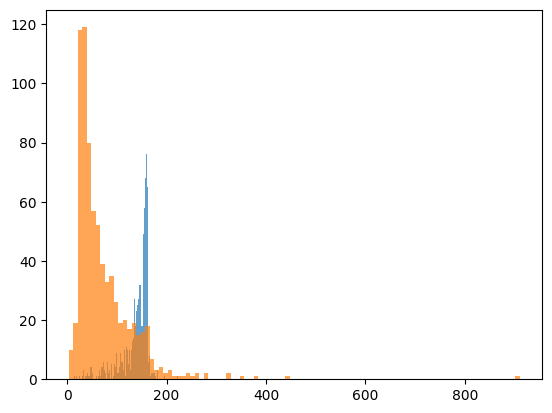

In [41]:
plt.hist(data[data.label=='spam']['length'], bins =100, alpha=0.7)
plt.hist(data[data.label=='ham']['length'], bins =100, alpha=0.7)
plt.show()

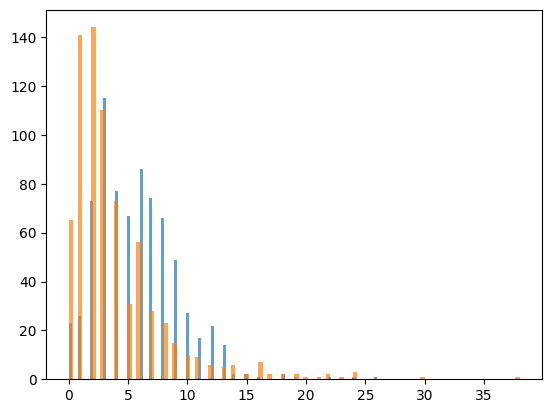

In [42]:
plt.hist(data[data.label=='spam']['punct'], bins =100, alpha=0.7)
plt.hist(data[data.label=='ham']['punct'], bins =100, alpha=0.7)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.message, data.label, test_size=0.3, random_state=0, shuffle=True)

In [44]:
X_train.shape, X_test.shape

((1045,), (449,))

In [45]:
# Building the model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [46]:
classifier = Pipeline([('tfidf', TfidfVectorizer()),("classifier", RandomForestClassifier(n_estimators=100))])

In [47]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [48]:
y_pred = classifier.predict(X_test)

In [49]:
y_pred, y_test

(array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
        'spam', 'ham', 'spam', 

In [50]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [51]:
accuracy_score(y_test, y_pred)

0.9532293986636972

In [52]:
0.9465478841870824 * 449

425.0

In [53]:
confusion_matrix(y_test, y_pred)

array([[227,   0],
       [ 21, 201]])

In [54]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']
test4 = ['You got lottery of $1 Trillion !! Share your credit card details']

In [55]:
classifier.predict(test1)

array(['ham'], dtype=object)

In [56]:
classifier.predict(test2)

array(['ham'], dtype=object)

In [57]:
classifier.predict(test3)

array(['spam'], dtype=object)

In [58]:
classifier.predict(test4)

array(['ham'], dtype=object)